<a href="https://colab.research.google.com/github/yunha91/analysis/blob/master/best_seller_agoda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import re
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
files.upload()

Saving bestsellers with categories.csv to bestsellers with categories.csv


{'bestsellers with categories.csv': b'Name,Author,User Rating,Reviews,Price,Year,Genre\r\n10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction\r\n11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction\r\n12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction\r\n1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction\r\n"5,000 Awesome Facts (About Everything!) (National Geographic Kids)",National Geographic Kids,4.8,7665,12,2019,Non Fiction\r\nA Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction\r\nA Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons,George R. R. Martin,4.7,19735,30,2014,Fiction\r\nA Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction\r\n"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction\r\nA Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction\r\nA Man Called Ove: A N

In [5]:
df= pd.read_csv('bestsellers with categories.csv')

### 데이터에 대한 설명 
분석하고자하는 해당 자료는 2009~2019년까지 아마존에서 베스트셀러 50에 꼽힌 작품에 대한 데이터로 년도별, 장르별, 작가별로 분석을 하고 시간의 흐름에 따라 어떤 변화가 있는지, 칼럼별 어떤 특징이 있는지 확인해보도록 하겠습니다. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [8]:
df.shape

(550, 7)

In [9]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [10]:
df['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [11]:
df['Author'].value_counts()

Jeff Kinney                           12
Rick Riordan                          11
Suzanne Collins                       11
Gary Chapman                          11
American Psychological Association    10
                                      ..
The Washington Post                    1
Sasha O'Hara                           1
Celeste Ng                             1
Cheryl Strayed                         1
Muriel Barbery                         1
Name: Author, Length: 248, dtype: int64

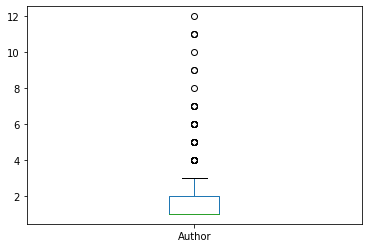

In [14]:
df['Author'].value_counts().plot(kind='box')

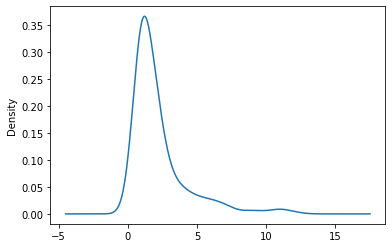

In [15]:
df['Author'].value_counts().plot(kind='kde')

# 연도별 장르별 

Text(0.5, 1.0, 'Year fiction_non fiction')

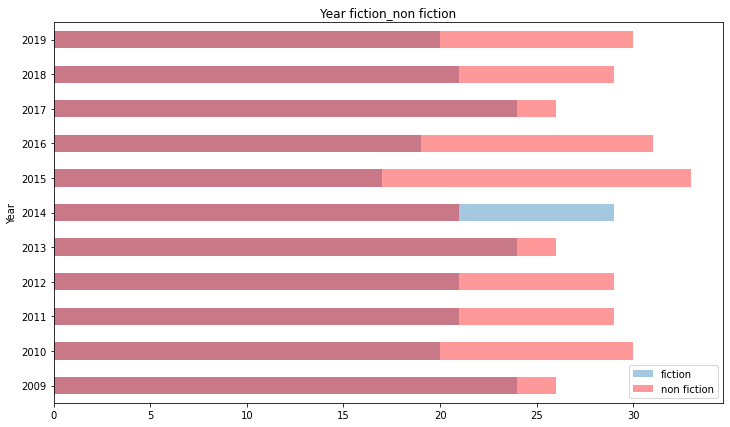

In [38]:
df.loc[df['Genre']=='Fiction'].groupby('Year').count()['Name'].plot(kind='barh', figsize=(12,7), alpha=0.4, label='fiction')
df.loc[df['Genre']=='Non Fiction'].groupby('Year').count()['Name'].plot(kind='barh', figsize=(12,7), alpha=0.4, color='red',label='non fiction')
plt.legend()

plt.title('Year fiction_non fiction')

#### 2014년에는 베스트셀러에 선정된 소설 장르 중 '픽션'이 많았으며, 그 외에는 논픽션 작품의 베스트셀러 선정이 더 많았습니다. 

#### 대부분 픽션과 논픽션의 차이가 크지 않지만, 가장 차이가 큰 연도는 2015, 2016년 입니다. 

# 연도별 작가별 

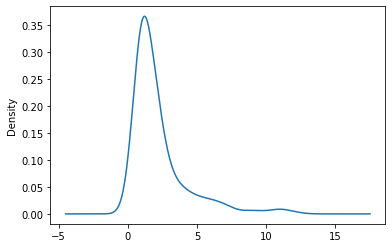

In [49]:
df.groupby('Author').count().sort_values(by='Name', ascending=False)['Name'].plot(kind='kde')

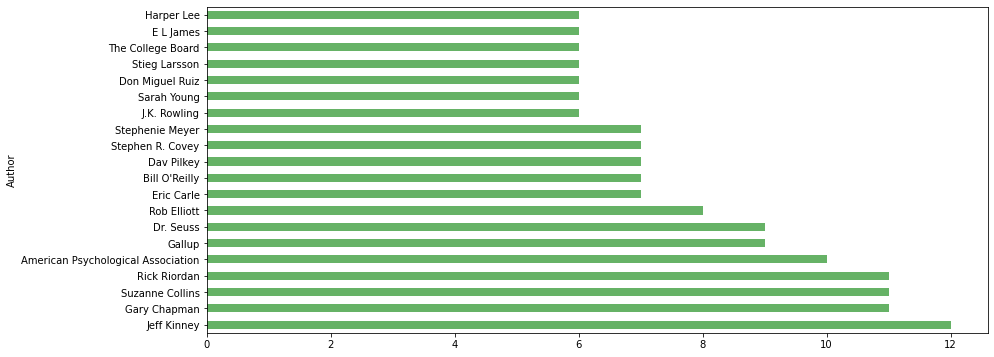

In [56]:
df.groupby('Author').count().sort_values(by='Name', ascending=False)['Name'].head(20).plot(kind='barh', figsize=(14,6), color='green', alpha=0.6)

In [57]:
df.groupby('Author').count().sort_values(by='Name', ascending=False)['Name'].head(20)

Author
Jeff Kinney                           12
Gary Chapman                          11
Suzanne Collins                       11
Rick Riordan                          11
American Psychological Association    10
Gallup                                 9
Dr. Seuss                              9
Rob Elliott                            8
Eric Carle                             7
Bill O'Reilly                          7
Dav Pilkey                             7
Stephen R. Covey                       7
Stephenie Meyer                        7
J.K. Rowling                           6
Sarah Young                            6
Don Miguel Ruiz                        6
Stieg Larsson                          6
The College Board                      6
E L James                              6
Harper Lee                             6
Name: Name, dtype: int64

In [58]:
df[['Year','Author','Name']].loc[df['Author']=='Jeff Kinney']

,Year,Author,Name
42,2011,Jeff Kinney,"Cabin Fever (Diary of a Wimpy Kid, Book 6)"
71,2013,Jeff Kinney,"Diary of a Wimpy Kid: Hard Luck, Book 8"
72,2009,Jeff Kinney,Diary of a Wimpy Kid: The Last Straw (Book 3)
73,2014,Jeff Kinney,Diary of a Wimpy Kid: The Long Haul
80,2009,Jeff Kinney,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum..."
88,2016,Jeff Kinney,Double Down (Diary of a Wimpy Kid #11)
253,2015,Jeff Kinney,Old School (Diary of a Wimpy Kid #10)
381,2017,Jeff Kinney,The Getaway
435,2018,Jeff Kinney,The Meltdown (Diary of a Wimpy Kid Book 13)
468,2012,Jeff Kinney,"The Third Wheel (Diary of a Wimpy Kid, Book 7)"


In [59]:
df[['Year','Author','Name']].loc[df['Author']=='Gary Chapman']

,Year,Author,Name
320,2010,Gary Chapman,The 5 Love Languages: The Secret to Love That ...
321,2011,Gary Chapman,The 5 Love Languages: The Secret to Love That ...
322,2012,Gary Chapman,The 5 Love Languages: The Secret to Love That ...
323,2013,Gary Chapman,The 5 Love Languages: The Secret to Love That ...
324,2014,Gary Chapman,The 5 Love Languages: The Secret to Love That ...
325,2015,Gary Chapman,The 5 Love Languages: The Secret to Love that ...
326,2016,Gary Chapman,The 5 Love Languages: The Secret to Love that ...
327,2017,Gary Chapman,The 5 Love Languages: The Secret to Love that ...
328,2018,Gary Chapman,The 5 Love Languages: The Secret to Love that ...
329,2019,Gary Chapman,The 5 Love Languages: The Secret to Love that ...


In [60]:
df[['Year','Author','Name']].loc[df['Author']=='Suzanne Collins']

,Year,Author,Name
46,2010,Suzanne Collins,Catching Fire (The Hunger Games)
47,2011,Suzanne Collins,Catching Fire (The Hunger Games)
48,2012,Suzanne Collins,Catching Fire (The Hunger Games)
236,2010,Suzanne Collins,Mockingjay (The Hunger Games)
237,2011,Suzanne Collins,Mockingjay (The Hunger Games)
238,2012,Suzanne Collins,Mockingjay (The Hunger Games)
407,2010,Suzanne Collins,The Hunger Games
408,2011,Suzanne Collins,The Hunger Games (Book 1)
409,2012,Suzanne Collins,The Hunger Games (Book 1)
410,2011,Suzanne Collins,The Hunger Games Trilogy Boxed Set (1)


In [61]:
df[['Year','Author','Name']].loc[df['Author']=='Rick Riordan']

,Year,Author,Name
264,2010,Rick Riordan,Percy Jackson and the Olympians Paperback Boxe...
343,2014,Rick Riordan,The Blood of Olympus (The Heroes of Olympus (5))
406,2013,Rick Riordan,"The House of Hades (Heroes of Olympus, Book 4)"
418,2009,Rick Riordan,The Last Olympian (Percy Jackson and the Olymp...
419,2010,Rick Riordan,The Last Olympian (Percy Jackson and the Olymp...
428,2010,Rick Riordan,"The Lost Hero (Heroes of Olympus, Book 1)"
432,2012,Rick Riordan,"The Mark of Athena (Heroes of Olympus, Book 3)"
456,2010,Rick Riordan,"The Red Pyramid (The Kane Chronicles, Book 1)"
458,2012,Rick Riordan,"The Serpent's Shadow (The Kane Chronicles, Boo..."
463,2011,Rick Riordan,"The Son of Neptune (Heroes of Olympus, Book 2)"


# 작가별 리뷰수 

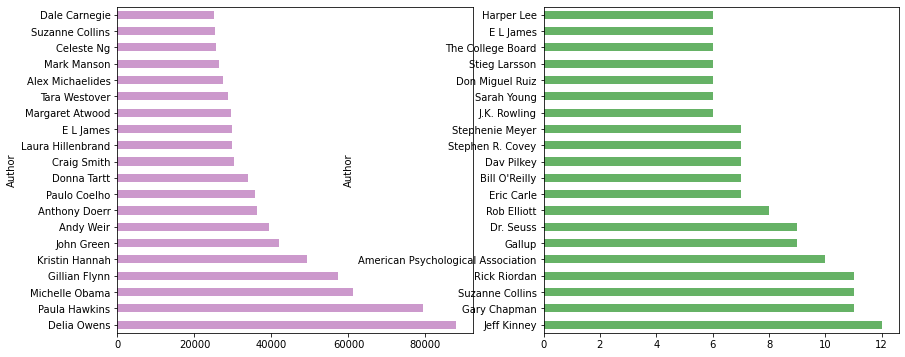

In [123]:
plt.figure(figsize=(17,10))
plt.subplot(121)
df.groupby('Author').mean()['Reviews'].sort_values(ascending=False).head(20).plot(kind='barh', color='purple', alpha=0.4, figsize=(14,7))
plt.subplot(122)
df.groupby('Author').count().sort_values(by='Name', ascending=False)['Name'].head(20).plot(kind='barh', figsize=(14,6), color='green', alpha=0.6)

In [81]:
top_list = df.groupby('Author').count().sort_values(by='Name', ascending=False)['Name'].head(20).index

In [106]:
list=['Jeff Kinney', 'Gary Chapman', 'Suzanne Collins', 'Rick Riordan',
       'American Psychological Association', 'Gallup', 'Dr. Seuss',
       'Rob Elliott', 'Eric Carle',  'Dav Pilkey',
       'Stephen R. Covey', 'Stephenie Meyer', 'J.K. Rowling', 'Sarah Young',
       'Don Miguel Ruiz', 'Stieg Larsson', 'The College Board', 'E L James',
       'Harper Lee']

In [111]:
list = pd.DataFrame(list)

In [113]:
list.columns=['Author']
top_list = pd.merge(list, df, on='Author', how='left')

No handles with labels found to put in legend.


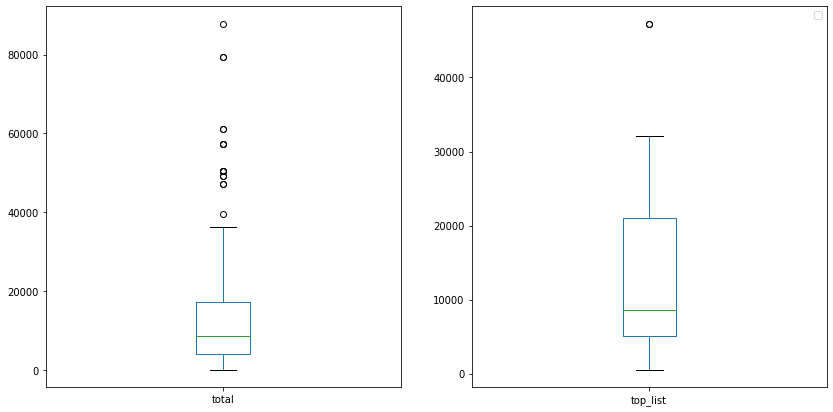

In [121]:
plt.subplot(121)
df['Reviews'].plot(kind='box', figsize=(14,7), label ='total')
plt.subplot(122)
top_list['Reviews'].plot(kind='box',figsize=(14,7), label ='top_list')
plt.legend()

#### 2009~2019년에 걸쳐 베스트셀러 작가로 많이 선정되었다고 리뷰수가 높은 것은 아님을 알 수 있습니다. 
 전체 리뷰수 분포를 보면 40000~80000대의 리뷰수를 보유한 작품들도 있음을 알 수 있습니다. 

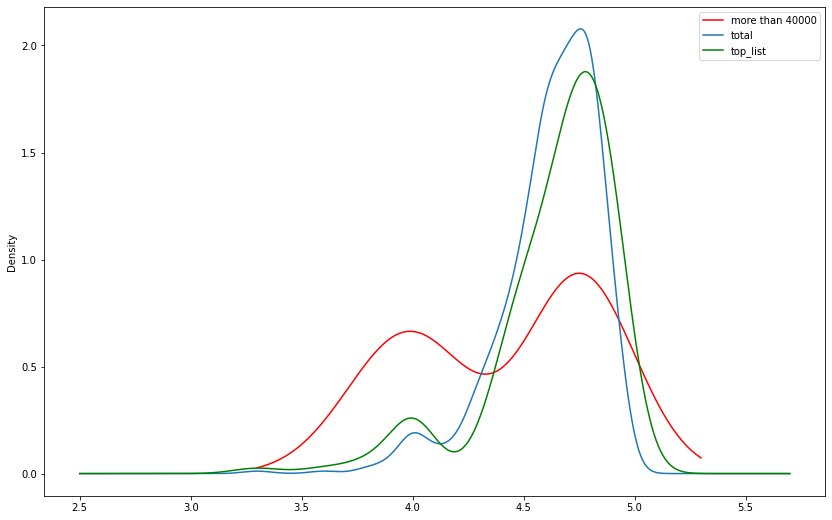

In [143]:
plt.figure(figsize=(14,9))

df[df['Reviews']>40000]['User Rating'].plot(kind='kde', label='more than 40000', color='red')
df['User Rating'].plot(kind='kde', label='total')
top_list['User Rating'].plot(kind='kde', label='top_list', color='green')
plt.legend()

평점이 높은 책이라고해서 리뷰수가 많은 것도 아님을 알 수 있다. 전반적인 책 보다 오히려 리뷰수가 많은 책들의 별점 분포가 더 퍼져있다. 

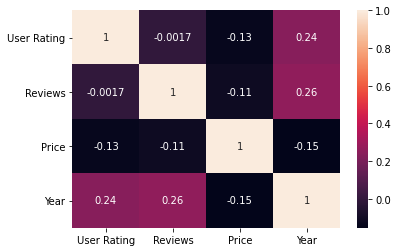

In [147]:
sns.heatmap(df.corr(), annot=True)